In [1]:
import pandas as pd
import numpy as np
import re

# 1 Load Data and basic analysis

In [2]:
df = pd.read_excel('/Users/luyin/Desktop/project/Q&A.xlsx',header = 0)

In [3]:
df.head(3)

,Id,Company,Participants,Date,Event name,Event type,Analyst name,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
0,1,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,"The performance in equities was great, and you...",There wasn’t anything particularly noteworthy ...,NIR,Markets,Equities,LOB,CIB,NaN
1,2,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,You and others have been talking with your pri...,"Yes, this is where it would be. I wouldn’t say...",NIR,Markets,Prime brokerage / ROA,LOB,CIB,NaN
2,3,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,In Jamie’s letter he talked about mentioning t...,"No, it is more of the same. Obviously, G-SIB t...",Regulatory Capital and Liquidity,GSIB,NaN,Firmwide,Capital,NaN


In [4]:
df.columns = ['id']+ list(df.columns[1:])
df.groupby('Event type').count()

,id,Company,Participants,Date,Event name,Analyst name,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
Event type,,,,,,,,,,,,,,,
Conference,1403,1403,1403,1403,1403,1203,1203,1403,1403,1403,1403,1032,1403,1403,618
Earnings call,2823,2823,2823,2823,2823,2817,2817,2823,2823,2823,2823,2077,2823,2823,1140
Fixed income call,258,258,258,258,258,248,248,258,258,258,258,191,258,258,64
Investor Day,18,18,18,18,18,0,0,18,18,18,18,14,18,18,3
Investor day,49,49,49,49,49,40,40,49,49,49,49,40,49,49,30
Other,7,7,7,7,7,7,7,7,7,7,7,6,7,7,3


In [5]:
df.groupby('Analyst name').count()

,id,Company,Participants,Date,Event name,Event type,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
Analyst name,,,,,,,,,,,,,,,
Adam Hurwich,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Alevizos Alevizakos,14,14,14,14,14,14,14,14,14,14,14,11,14,14,9
Andrew Lim,20,20,20,20,20,20,20,20,20,20,20,13,20,20,7
Arnold Kakuda,30,30,30,30,30,30,30,30,30,30,30,17,30,30,8
Bill Carcache,25,25,25,25,25,25,25,25,25,25,25,20,25,25,12
Brennan Hawken,114,114,114,114,114,114,114,114,114,114,114,88,114,114,34
Brian Foran,24,24,24,24,24,24,24,24,24,24,24,22,24,24,9
Brian Kleinhanzl,82,82,82,82,82,82,82,82,82,82,82,65,82,82,34
Brian Klock,19,19,19,19,19,19,19,19,19,19,19,12,19,19,6


In [6]:
l = df['Analyst name'].unique() # 79 unique analyst

# 2. Tokenize questions by analyst name

In [7]:
dic = {} #create dictionary for questions

for name in l:
    list_ = list(df.loc[df['Analyst name']  == name]['Question'])
    dic[name] = list_

In [8]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [46]:
import spacy
import string
# Load English tokenizer, tagger, parser, NER and word vectors
from spacy.lang.en.stop_words import STOP_WORDS
# STOP_WORDS.add('\xa0')
# STOP_WORDS.add('and')
# STOP_WORDS.add('like')
# STOP_WORDS.add('\n')
# STOP_WORDS.add('think')
# STOP_WORDS.add("'s")
# STOP_WORDS.add(" ")
STOP_WORDS |= {'\xa0','and','like','\n', 'think', "'s", " ", "'re", '’s', '’m', "'m", "re",'ve', 'is'}
STOP_WORDS -= {'who','where','how', 'what', 'when', 'whenever'}

# STOP_WORDS.remove("whatever")
# STOP_WORDS.remove("what")
# STOP_WORDS.remove("when")
# STOP_WORDS.remove("where")
# STOP_WORDS.remove("how")

tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation
# tokens.ents stands for entity in the word
# https://spacy.io/usage/spacy-101#annotations-token
# lowercase and remove punctuation and stop words
def tokenize(sent):
    sent = re.sub('[^A-Za-z&]', ' ', sent) # replace non-letter with space
    sent = re.sub(r'\b[a-zA-Z]\b', '', sent) #remove single letter 
    tokens = tokenizer(sent)
    return [(token.lemma_) for token in tokens if \  # add the lemma here
            (token.text.lower() not in punctuations \
             and token.lemma_ not in STOP_WORDS \
             and token.pos_ in ('PROPN', 'VERB', 'NOUN'))] # only keep PRONOUN, VERB and NOUN
# test
tokens = tokenize(" I'm 's what do you think or like apples and Apple is looking at buying and bought U.K. startup for $1 billion")
for token in tokens:
    print (token)
    

what
apple
apple
look
buy
buy


In [47]:
from collections import Counter
max_vocab_size = 10

l = df['Analyst name'].unique() # 79 unique analyst
word_dic = {}
all_word_dic = {} # all tokens with analyst name
for name in l:
    token_dataset = []
    all_tokens = []
    for q in dic[name]:
        tokens = tokenize(q)
        token_dataset.append(tokens)
        all_tokens += tokens
        top10 = Counter(all_tokens).most_common(max_vocab_size)
        word_dic[name] = top10
        all_word_dic[name] = all_tokens
        
print(word_dic['Glenn Schorr'])

[('what', 89), ('quarter', 72), ('year', 53), ('question', 50), ('talk', 48), ('growth', 48), ('want', 42), ('rate', 42), ('business', 39), ('lot', 39)]


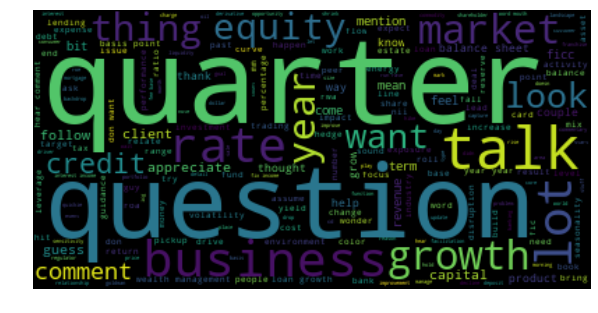

In [71]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
test1  = ' '.join(word for word in all_word_dic['Glenn Schorr'])
wordcloud = WordCloud().generate(test1)

# print(dic['Glenn Schorr'][0])

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# from PIL import Image

# image = Image.open('/Users/luyin/Desktop/project/sample plot wordcloud.png')
# display(image)

In [69]:
# # Create and generate a word cloud image:
# test2 = ''
# for question in dic['Glenn Schorr']:
#     test2 +=  question

# wordcloud = WordCloud().generate(test2)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [72]:
from nltk.util import ngrams
import collections
from nltk import word_tokenize
import nltk
import matplotlib
import re

In [73]:
def my_tokenize(sent):
    sent = re.sub('[^A-Za-z&]', ' ', sent)
    sent2 = " ".join(sent.split())
    tokens = word_tokenize(sent2)
    tokens = [x.lower() for x in tokens]
#     tokens2 = [w for w in tokens if not w in STOP_WORDS]
    return tokens2

In [74]:
def ngrams_(n_gram, analyst_name, top_n):
#     raw = " ".join(dic[analyst_name])
#     tokens = my_tokenize(raw)
    tokens = all_word_dic[analyst_name]# global dictionary with all tokens group by analyst name
    if len(tokens)>1:
        many_gram = ngrams(tokens, n_gram)
        freq = collections.Counter(many_gram)
        return freq.most_common(top_n)

In [75]:
ngrams_(2, 'Glenn Schorr', 10)

[(('balance', 'sheet'), 16),
 (('wealth', 'management'), 16),
 (('basis', 'point'), 15),
 (('loan', 'growth'), 12),
 (('don', 'want'), 11),
 (('year', 'year'), 10),
 (('hear', 'comment'), 8),
 (('happen', 'quarter'), 6),
 (('guess', 'question'), 6),
 (('run', 'rate'), 6)]

In [76]:
def wordfreqviz(analyst_name, top_n):
    rslt = wordfreq(analyst_name, top_n)
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(analyst_name, top_n):
    raw = " ".join(dic[analyst_name])
    text = tokenize(raw)
    word_dist = nltk.FreqDist(text)
    rslt = pd.DataFrame(word_dist.most_common(top_n),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

In [78]:
dic_analyst = {}
for analyst in l:
    r = " ".join(dic[analyst])
    words = re.sub('[^A-Za-z&]', ' ', r) # replace none letters to space
    words = " ".join(words.split())
    dic_analyst[analyst] = words

In [79]:
dic_analyst_value = list(dic_analyst.values())
vectorizer2 = TfidfVectorizer(max_df = 0.70, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
    ngram_range=(2,4), use_idf=1,smooth_idf=1,sublinear_tf=1,
    stop_words = 'english')
vec = vectorizer2.fit_transform(dic_analyst_value)

In [80]:
weights = np.asarray(vec.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer2.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
162491,little bit,0.009792
108887,going forward,0.006236
75491,don t,0.006053
147820,just wanted,0.005973
15255,balance sheet,0.005961
164876,loan growth,0.005855
172296,m just,0.005853
315954,u s,0.005748
111103,good morning,0.005611
328187,wealth management,0.005035


In [81]:
wordfreq('Glenn Schorr', 4)

,Frequency
Word,
what,89
quarter,72
year,53
question,50


In [82]:
from numpy import nan
dic_2_gram = {}
for analyst in l:
    if analyst is not nan: # incase there is a nan in the dictionary
        dic_2_gram[analyst] = ngrams_(2,analyst,5)

In [83]:
dic_2_gram

{'Glenn Schorr': [(('balance', 'sheet'), 16),
  (('wealth', 'management'), 16),
  (('basis', 'point'), 15),
  (('loan', 'growth'), 12),
  (('don', 'want'), 11)],
 'John McDonald': [(('interest', 'income'), 39),
  (('talk', 'bit'), 36),
  (('efficiency', 'ratio'), 27),
  (('investment', 'bank'), 22),
  (('loan', 'growth'), 20)],
 'Erika Najarian': [(('balance', 'sheet'), 23),
  (('market', 'share'), 18),
  (('follow', 'question'), 15),
  (('wells', 'fargo'), 14),
  (('expense', 'management'), 13)],
 "Matthew O'Connor": [(('interest', 'income'), 29),
  (('point', 'view'), 28),
  (('balance', 'sheet'), 23),
  (('year', 'year'), 21),
  (('couple', 'year'), 20)],
 'Chris Spahr': [(('winner', 'consolidation'), 2),
  (('cet', 'ratio'), 1),
  (('ratio', 'guidance'), 1),
  (('guidance', 'kind'), 1),
  (('kind', 'guidance'), 1)],
 'Gerard Cassidy': [(('what', 'guy'), 21),
  (('credit', 'card'), 17),
  (('market', 'share'), 16),
  (('guy', 'look'), 16),
  (('payout', 'ratio'), 16)],
 'Eric Wasser

In [27]:
import kenlm
import os
import os.path

In [28]:
analyst_name = 'Glenn Schorr'
save_path = '/Users/luyin/Desktop/DS1011/lab6/'
name_of_file = analyst_name
completeName = os.path.join(save_path, name_of_file+".txt")         
file1 = open(completeName, "w")

sent = ''
for values in dic[analyst_name]:
    sent+= values
    
file1.write(sent)
file1.close()

In [29]:
# !tr '\n' ' ' < /Users/luyin/Desktop/DS1011/lab6/file.txt

In [30]:
test_file = save_path +analyst_name +'.txt'

In [31]:
# !build_binary -s

In [32]:
#bigram
!/Users/luyin/Downloads/kenlm/build/bin/lmplz -o 2 < '/Users/luyin/Desktop/DS1011/lab6/Glenn Schorr.txt'> analyst2gram.arpa

=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 11787 types 2565
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:30780 2:6871917056
Statistics:
1 2565 D1=0.687109 D2=1.1205 D3+=1.43683
2 8250 D1=0.812042 D2=1.28079 D3+=1.47958
Memory estimate for binary LM:
type     kB
probing 210 assuming -p 1.5
probing 220 assuming -r models -p 1.5
trie    103 without quantization
trie     81 assuming -q 8 -b 8 quantization 
trie    103 assuming -a 22 array pointer compression
trie     81 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:30780 2:132000
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
#####################

In [33]:
!/Users/luyin/Downloads/kenlm/build/bin/lmplz -o 4 < '/Users/luyin/Desktop/DS1011/lab6/Glenn Schorr.txt'> analyst4gram.arpa

=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 11787 types 2565
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:30780 2:1169687936 3:2193165056 4:3509063936
Statistics:
1 2565 D1=0.687109 D2=1.1205 D3+=1.43683
2 8250 D1=0.840019 D2=1.2083 D3+=1.72222
3 10722 D1=0.943082 D2=1.45416 D3+=1.74256
4 11279 D1=0.952716 D2=1.75832 D3+=0.846033
Memory estimate for binary LM:
type     kB
probing 708 assuming -p 1.5
probing 829 assuming -r models -p 1.5
trie    325 without quantization
trie    190 assuming -q 8 -b 8 quantization 
trie    309 assuming -a 22 array pointer compression
trie    174 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:30780 2:132000 3:214440 4

In [34]:
bigram_model = kenlm.LanguageModel('analyst2gram.arpa')
fourgram_model = kenlm.LanguageModel('analyst4gram.arpa')

In [35]:
def get_ppl(model, sent):
    return 10**(-model.score(sent)/len(sent.split()))

In [114]:
score = {}
for question in dic[analyst_name]:
    s = float(get_ppl(bigram_model, question))
    if s > 10:
        score[question] = s

In [115]:
score_4= {}
for question in dic[analyst_name]:
    s = float(get_ppl(fourgram_model, question))
    if s > 10:
        score_4[question] = s

In [140]:
def get_n_longest_values(dictionary, n):
    longest_entries = sorted(dictionary.items(), key=lambda t: t[1], reverse=False)[:n]
    for key, value in longest_entries:
        print(key,'score: {}'.format(round(value,4)),"\n")

In [142]:
top_sentence = 5
print('For {}, the top {} questions are: '.format(analyst_name, top_sentence))
print("\n")
get_n_longest_values(score, 5)

For Glenn Schorr, the top 5 questions are: 


So, I liked the improvement on the efficiency ratio targets and I liked the commitmentto the target ranges. Just a quick curious question on – I don't think of y ou as the biggest rate beneficiary, but it helps.
But, what ty pe of rate scenario do y ou have embedded in there? Or I kind of liked y our tone from last quarter of
we're going to hit them one way or another.
 score: 20.2216 

Just maybe an update. In Wealth Management, in the past, you’ve provided statistics on, I guess the last time you
showed it, 100% of days in the year, you earned between $50mm and $70mm. Is that still the right range? Is the
range rising as interest rates, as you go more fee-based and the markets go up? And then while I’m getting
greedy, if you might update us on what percentage of assets are in the $1mm and above camp inside Wealth
Management? score: 20.6546 

I definitely appreciate that. It touches on the ability to hit, I guess, a double-digit EPS number

In [144]:
top_sentence = 5
print('For analyst {} the top {} sentences are: '.format(analyst_name, top_sentence))
print("\n")
get_n_longest_values(score_4, 5)

For analyst Glenn Schorr the top 5 sentences are: 


Maybe some of your ex-colleagues can send some more tweets and increase the activity levels – I’m kidding. Last question on I&L, it’s good to have that reprieve on terms of the I&L funded divestments. I’m curious, if it changes at all, how you approach the way we had asked you every quarter about what’s left in equity, what do you need to divest, and that whole game plan, so I’m curious on your thoughts there. score: 10.0059 

On FICC, the macro products are great, but credit and mortgage wasn't, so not exactly hitting on all cylinders as a whole, but it certainly seems like maybe some of the reduced capacity in the industry is helping you, and so your long-term strategy that we all beat you up for, for the last five years might be working. Could you talk towards what you're seeing in terms of capacity? And now that you've seen a pickup in volatility, what it means? score: 10.0179 

One other one, in GWIM, I appreciate all the color 

In [145]:
df.head(5)

,id,Company,Participants,Date,Event name,Event type,Analyst name,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
0,1,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,"The performance in equities was great, and you...",There wasn’t anything particularly noteworthy ...,NIR,Markets,Equities,LOB,CIB,NaN
1,2,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,You and others have been talking with your pri...,"Yes, this is where it would be. I wouldn’t say...",NIR,Markets,Prime brokerage / ROA,LOB,CIB,NaN
2,3,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,In Jamie’s letter he talked about mentioning t...,"No, it is more of the same. Obviously, G-SIB t...",Regulatory Capital and Liquidity,GSIB,NaN,Firmwide,Capital,NaN
3,4,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,John McDonald,Sanford C. Bernstein & Co.,"On net interest income, do you have an outlook...","So again, assuming for a second that rates don...",NII / Balance Sheet,ALM / Rates / Duration,Rates,Firmwide,Balance sheet,NaN
4,5,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Erika Najarian,Bank of America,"On CCAR, do you expect any potential surcharge...","Taking your first point, Erika, obviously, I d...",Regulatory Capital and Liquidity,GSIB,CCAR,Firmwide,Capital,NaN


# Generate Last tag column new df called 'df2'

In [242]:
df2 = df[['id','Company', 'Date', 'Event name', 'Event type', 'Analyst name', 'Analyst company', 'Breakout']]

In [244]:
df2['Breakout'].unique()

array(['CIB', 'Capital', 'Balance sheet', 'Expenses', 'CB',
       'Credit costs', 'Accounting and taxes', 'CCB', 'Other topics',
       'AWM', 'Legal', 'Macroeconomic update', 'Revenue',
       'Regulatory topics'], dtype=object)

In [245]:
df_t = df2[['Breakout']]
df_t.columns = ['Last tag']

In [246]:
null_data = []
null_data.insert(0, {'Last tag':'First Question'})
df_tag = pd.concat([pd.DataFrame(null_data), df_t], ignore_index=True)
df_tag = df_tag[:-1] #drop the last column in df_tag

In [248]:
df2['Last tag'] = df_tag['Last tag']

/Users/luyin/anaconda3/envs/nlps/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [249]:
df2.head()

,id,Company,Date,Event name,Event type,Analyst name,Analyst company,Breakout,Last tag
0,1,JPMorgan Chase,2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,CIB,First Question
1,2,JPMorgan Chase,2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,CIB,CIB
2,3,JPMorgan Chase,2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,Capital,CIB
3,4,JPMorgan Chase,2015-04-14,1Q15 earnings call,Earnings call,John McDonald,Sanford C. Bernstein & Co.,Balance sheet,Capital
4,5,JPMorgan Chase,2015-04-14,1Q15 earnings call,Earnings call,Erika Najarian,Bank of America,Capital,Balance sheet


In [251]:
df_2temp = df2.drop_duplicates('Event name', keep='first')['id'] #find index for the first question for each unique event
idx_list = df_2temp.index

In [252]:
new_df = pd.DataFrame({'Last tag': 'First Quesion'}, index= idx_list) # update each first question to "First Question"
df2.update(new_df)

In [257]:
# #test 
# df_2temp2 = df2.drop_duplicates('Event name', keep='first')

In [258]:
df_2temp2.head(5) #test

,id,Company,Date,Event name,Event type,Analyst name,Analyst company,Breakout,Last tag
0,1,JPMorgan Chase,2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,CIB,First Quesion
230,231,JPMorgan Chase,2015-07-14,2Q15 earnings call,Earnings call,Erika Najarian,Bank of America,Capital,First Quesion
452,453,JPMorgan Chase,2015-10-13,3Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,CIB,First Quesion
654,655,JPMorgan Chase,2016-01-14,4Q15 earnings call,Earnings call,Brennan Hawken,UBS,CIB,First Quesion
835,836,JPMorgan Chase,2016-04-13,1Q16 earnings call,Earnings call,Matthew Burnell,Wells Fargo,Credit costs,First Quesion
